<span style="background-color:Blue;
             color:white;
             font-size:21px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid Blue;
             padding:0px 80px;">🎑 🌱 🌳Predictive-modeling-for-Agriculture-Project-main 🌿 🌴
</span>

In this Project we Step into the fascinating world of agriculture with this use case! Discover how multi-class machine learning is being utilized to assist farmers in cultivating the perfect crop each season. Through hands-on experience with actual scenarios, we'll learn the art of applying supervised ML and feature selection techniques to solve real-world problems.
A farmer reached out to us as a machine learning expert seeking help to select the best crop for his field. Due to budget constraints, the farmer explained that he could only afford to measure two out of the four essential soil measures:

Nitrogen content ratio in the soil
Phosphorous content ratio in the soil
Potassium content ratio in the soil
pH value of the soil
The expert realized that this is a classic feature selection problem, where the objective is to pick the most important features that could help predict the crop accurately. Can we help him?

Project Tasks
In this project, we will be introduced to two techniques for feature selection and apply them to the farmer's problem. By working on this project, we will gain valuable insights into how machine learning can solve real-world agricultural problems.

# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

Consider a scenario where a farmer reached out to me as a machine learning expert for assistance in selecting the best crop for his field. They've provided with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, I will apply machine learning to build a multi-class classification model to predict the type of `"crop"`, while using techniques to avoid multicollinearity, which is a concept where two or more features are highly correlated.

In [1]:
# All required libraries are imported here for you.
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import f1_score

# Load the dataset
crops = pd.read_csv("soil_measures.csv")

# Target variable column 'crop' values are counted
crops['crop'].value_counts()

crop
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [2]:
crops.columns

Index(['N', 'P', 'K', 'ph', 'crop'], dtype='object')

Exploring the dataframe and inspecting the null values of each column in dataframe

In [3]:
crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB


Training and test sets are split using scikit-learn.
Random seed 42 is used for reproducibility.

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(crops[['N', 'P', 'K', 'ph']], crops[['crop']], test_size=0.2, random_state=42)

F1 score (combination of precision and recall), a popular performance measure for classification and often preferred over, for example accruacy when data is unbalanced, such as when the quantity of examples belonging to one class significantly outnumbers those found in the other class, is calculated for this project.

In [5]:
# Train a logistic regression model for each feature
for feature in ['N', 'P', 'K', 'ph']:
    log_reg = LogisticRegression(max_iter=4000, multi_class="multinomial")
    log_reg.fit(X_train[[feature]], y_train.values.ravel())
    y_pred = log_reg.predict(X_test[[feature]])
    f1=f1_score(y_test, y_pred, average="weighted")
    print(f"F1-score for {feature}: {f1}")

F1-score for N: 0.10489086409777873
F1-score for P: 0.13770290642069416
F1-score for K: 0.1897181811666794
F1-score for ph: 0.04532731061152114


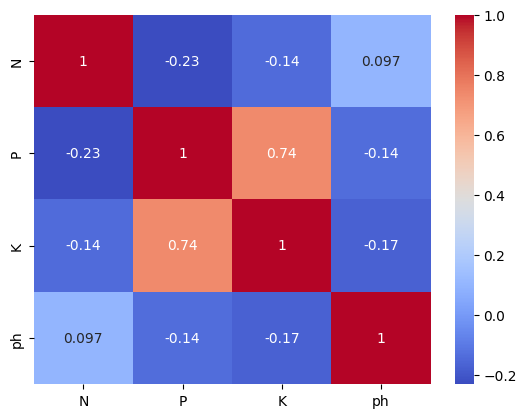

In [6]:
# Calculate the correlation matrix
crops_corr = crops[['N', 'P', 'K', 'ph']].corr()
# Create a heatmap using seaborn
sns.heatmap(crops_corr, annot=True, cmap='coolwarm')
plt.show()

For logistic regression classification with mutiple target variables, features that are less correlated with others are preferred.
Since K and P are positively highly correlated with each other, one of them is tossed.
In this case, P with less F-1 score is left out.

In [7]:
# Select the final features for the model
final_features = ['N', 'K', 'ph']
# Split the data with the final features
X_train, X_test, y_train, y_test = train_test_split(crops[final_features], crops['crop'], test_size=0.2, random_state=42)

In [29]:
# Train a new model and evaluate performance
log_reg = LogisticRegression(
    max_iter=100000, 
    multi_class="multinomial"
)
log_reg.fit(X_train, y_train)
y_pred=log_reg.predict(X_test)
model_performance = f1_score(y_test, y_pred, average='weighted')

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
model_performance

0.5998284900005928

Predictive model for agriculture with performance of nearly 60% is achieved. However, it has not been tested against with unseen data.

<div
<span style="background-color:Blue;
             color:white;
             font-size:38px;
             text-align:center;
             font-weight:bold;
             border:0px solid Blue;"> Thank You, for your Time 😃
</span>
</div>